In [8]:
%run './model/multi_corpus.py'
%run './constants.py'

%matplotlib inline

from matplotlib import cm

from scipy.stats import powerlaw, lognorm
from scipy.optimize import curve_fit
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import kstest
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
corpora = co_occurence_graphs(10_000)
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies Graph with 1378 nodes and 10000 edges
Geometry Graph with 983 nodes and 10000 edges
Geophysics Graph with 896 nodes and 10000 edges
Economics Graph with 996 nodes and 10000 edges
Language & Linguistics Graph with 1010 nodes and 10000 edges
Probability & Statistics Graph with 912 nodes and 10000 edges
Material Engineering Graph with 881 nodes and 10000 edges
Artificial Intelligence Graph with 951 nodes and 10000 edges
Sociology Graph with 943 nodes and 10000 edges
International Business Graph with 822 nodes and 10000 edges
Political Science Graph with 1037 nodes and 10000 edges
Genetics & Genomics Graph with 1328 nodes and 10000 edges
Immunology Graph with 1595 nodes and 10000 edges
Human Resources & Organizations Graph with 1054 nodes and 10000 edges
Ethnic & Cultural Studies Graph with 919 nodes and 10000 edges
Neurology Graph with 854 nodes and 10000 edges


# Edge Distribution

In [ ]:
from scipy.stats import kstest, norm, expon, uniform

# Define the candidate distributions to test against
distributions = {
    'log-normal': lognorm(s=sigma, scale=np.exp(mu)),
    'power-law': powerlaw(a=alpha)
}

In [15]:
for field_name, G in Gs.items():

    data = list(map(lambda tup: tup[1], G.degree()))

    values, frequencies = np.unique(data, return_counts=True)

    # Aggregate the data according to the provided frequencies
    data = np.repeat(values, frequencies)

    # Fit the parameters of the log-normal distribution to the data
    shape_log, loc_log, scale_log = lognorm.fit(data, floc=0)

    # Fit the parameters of the power-law distribution to the data
    shape_pow, loc_pow, scale_pow = powerlaw.fit(data, floc=0)

    # Perform the KS test for the log-normal distribution
    ks_statistic_log, p_value_log = kstest(data, 'lognorm', args=(shape_log, loc_log, scale_log))

    # Perform the KS test for the power-law distribution
    ks_statistic_pow, p_value_pow = kstest(data, 'powerlaw', args=(shape_pow, loc_pow, scale_pow))

    print(field_name)
    print('Log-Normal: ', round(ks_statistic_log, 4), round(p_value_log, 4))
    print('Powerlaw: ', round(ks_statistic_pow, 4), round(p_value_pow, 4))
    print('Log-Normal' if ks_statistic_log < ks_statistic_pow else 'Powerlaw')
    print()

Gender Studies
Log-Normal:  0.1736 0.0
Powerlaw:  0.3853 0.0
Log-Normal

Geometry
Log-Normal:  0.1351 0.0
Powerlaw:  0.3089 0.0
Log-Normal

Geophysics
Log-Normal:  0.1489 0.0
Powerlaw:  0.2794 0.0
Log-Normal

Economics
Log-Normal:  0.1281 0.0
Powerlaw:  0.3242 0.0
Log-Normal

Language & Linguistics
Log-Normal:  0.1394 0.0
Powerlaw:  0.3331 0.0
Log-Normal

Probability & Statistics
Log-Normal:  0.1412 0.0
Powerlaw:  0.3255 0.0
Log-Normal

Material Engineering
Log-Normal:  0.1219 0.0
Powerlaw:  0.3077 0.0
Log-Normal

Artificial Intelligence
Log-Normal:  0.1462 0.0
Powerlaw:  0.3383 0.0
Log-Normal

Sociology
Log-Normal:  0.1557 0.0
Powerlaw:  0.3091 0.0
Log-Normal

International Business
Log-Normal:  0.1229 0.0
Powerlaw:  0.2877 0.0
Log-Normal

Political Science
Log-Normal:  0.1448 0.0
Powerlaw:  0.3367 0.0
Log-Normal

Genetics & Genomics
Log-Normal:  0.1705 0.0
Powerlaw:  0.3751 0.0
Log-Normal

Immunology
Log-Normal:  0.2682 0.0
Powerlaw:  0.3864 0.0
Log-Normal

Human Resources & Organiza

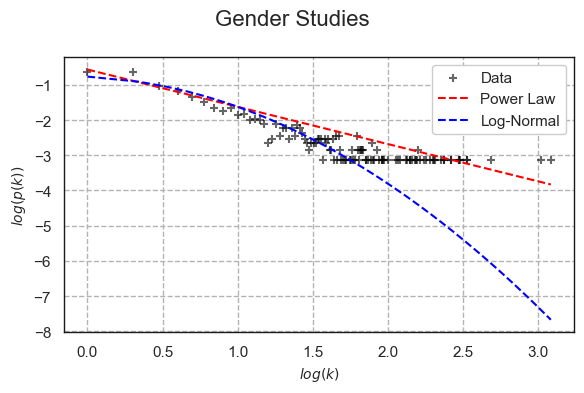

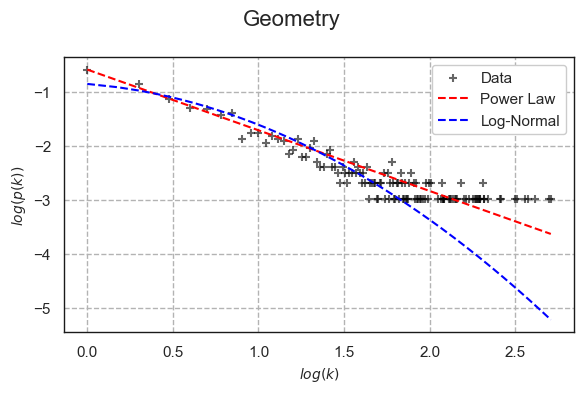

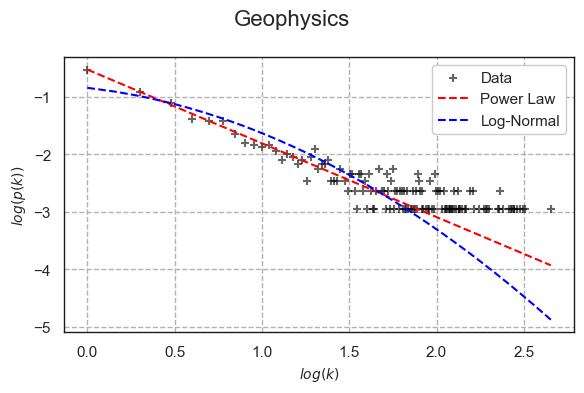

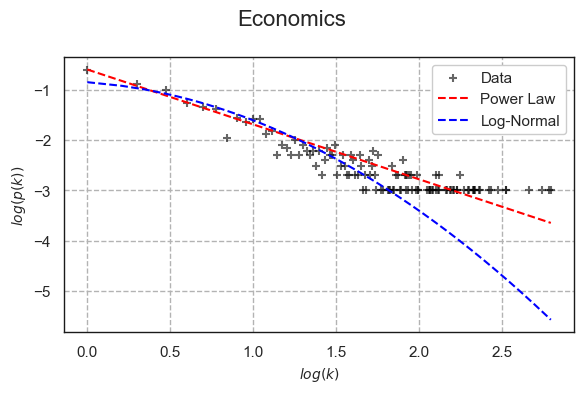

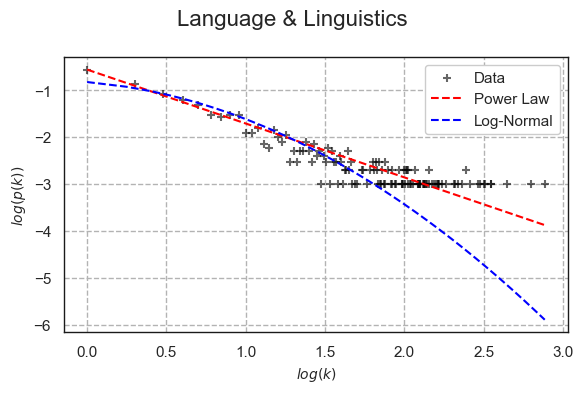

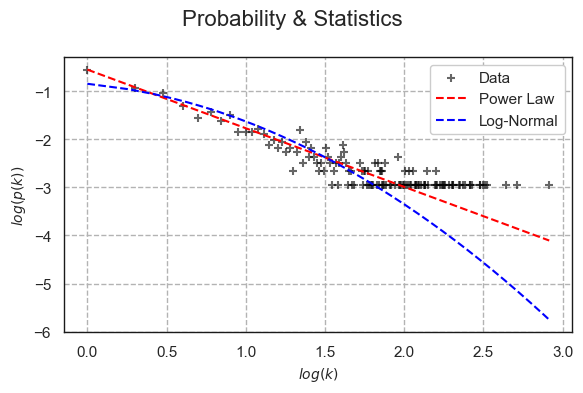

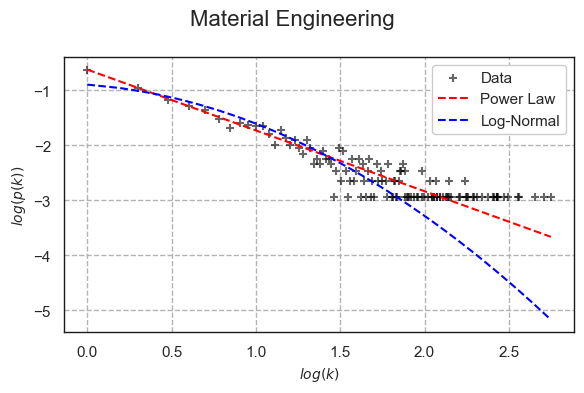

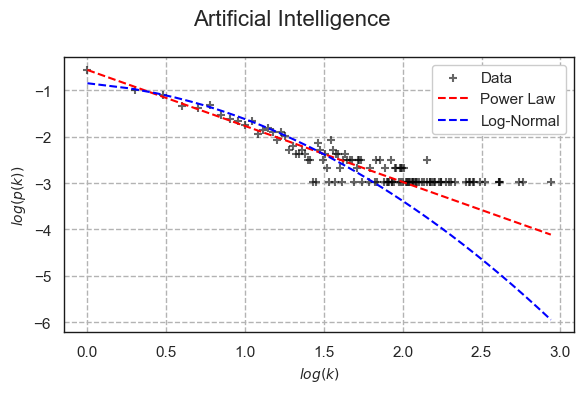

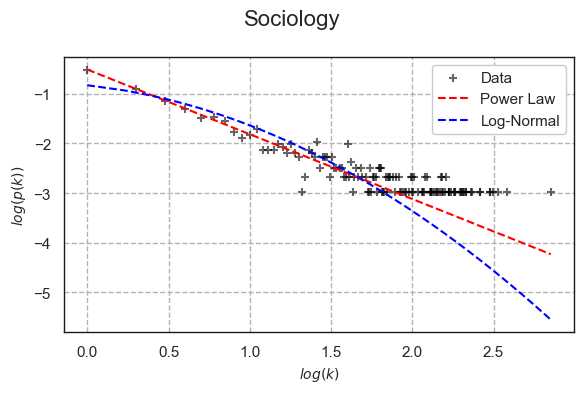

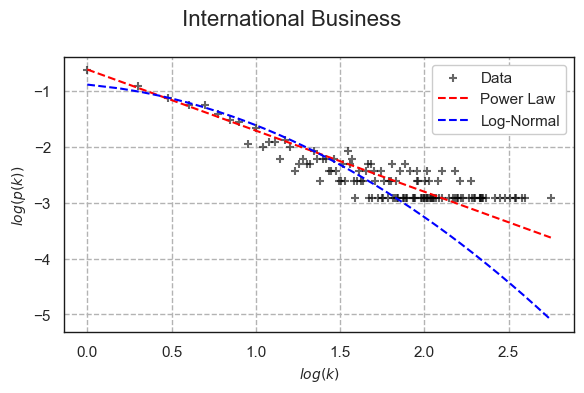

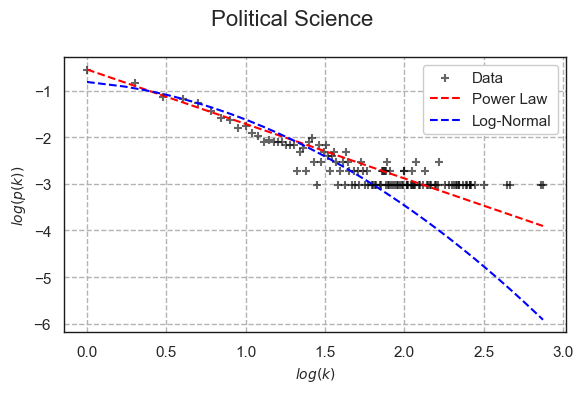

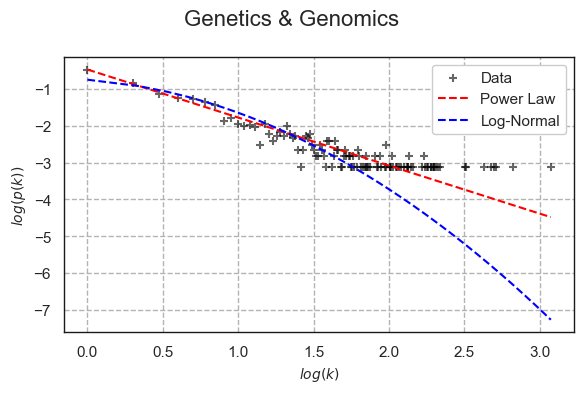

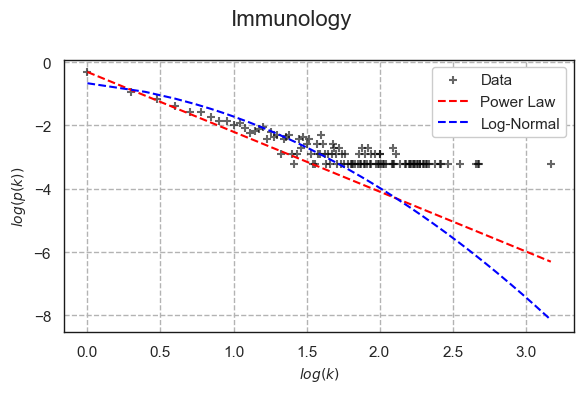

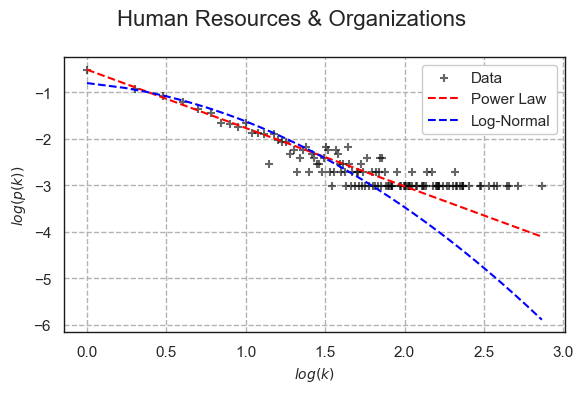

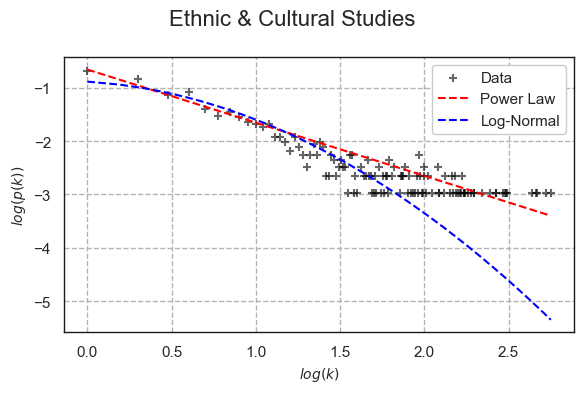

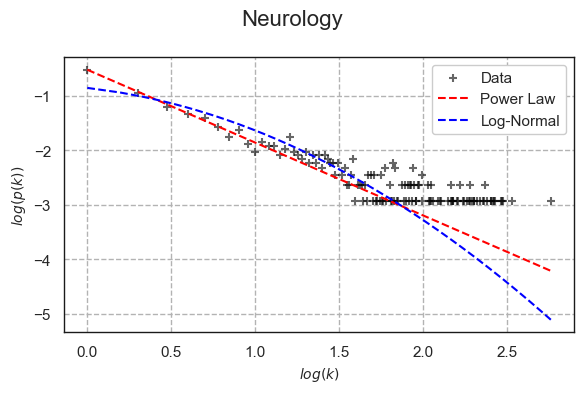

In [29]:
for field_name, G in Gs.items():

    data = list(map(lambda tup: tup[1], G.degree()))

    unique, counts = np.unique(data, return_counts=True)
    probabilities = counts / np.sum(counts)

    x = np.linspace(min(data), max(data), 1000)

    # Fit powerlaw
    power_law_func = lambda x, a, b: a * np.power(x, b)
    params_power_law, covariance = curve_fit(power_law_func, unique, probabilities, maxfev=10000)

    # Fit log-normal
    shape, loc, scale = lognorm.fit(data, floc=0)
    pdf_lognorm = lognorm.pdf(x, shape, loc, scale)

    

    data_sorted = np.sort(data)
    ecdf_values = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

    cdf_power_law = np.cumsum(power_law_func(np.sort(data), *params_power_law))
    cdf_power_law /= cdf_power_law[-1]  # Normalize

    cdf_lognorm = lognorm.cdf(np.sort(data), shape, loc, scale)

    # ks_stat_power_law, ks_p_power_law = kstest(ecdf_values, lambda x: np.interp(x, data_sorted, cdf_power_law))
    # ks_stat_lognorm, ks_p_lognorm = kstest(ecdf_values, lambda x: np.interp(x, data_sorted, cdf_lognorm))

    # # FIT

    # print(f'KS Powerlaw: {round(ks_stat_power_law, 3)} ({ks_p_power_law})')
    # print(f'KS Lognorm: {round(ks_stat_lognorm, 3)} ({ks_p_lognorm})')

    # mse_power_law = mean_squared_error(ecdf_values, cdf_power_law)
    # mse_lognorm = mean_squared_error(ecdf_values, cdf_lognorm)

    # print('MSE Powerlaw:', round(mse_power_law, 3))
    # print('MSE Lognorm:', round(mse_lognorm, 3))

    # mape_power_law = mean_absolute_percentage_error(ecdf_values, cdf_power_law)
    # mape_lognorm = mean_absolute_percentage_error(ecdf_values, cdf_lognorm)

    # print('MAPE Powerlaw:', round(mape_power_law, 3))
    # print('MAPE Lognorm:', round(mape_lognorm, 3))

    # Plotting with fitted Power Law and Log-Normal on the regular scatterplot
    # fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 9))
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

    # 1. Regular scatterplot
    # axes[0].scatter(unique, probabilities, marker='+', color='black', alpha=0.6, label='Data')
    # axes[0].plot(unique, power_law_func(unique, *params_power_law), color='red', linestyle='--', label='Fitted Power Law')
    # axes[0].plot(x, lognorm.pdf(x, shape, loc, scale), color='blue', linestyle='--', label='Fitted Log-Normal')
    # # axes[0].grid()
    # axes[0].set_xlabel('$k$', fontsize=10)
    # axes[0].set_ylabel('$p(k)$', fontsize=10)
    # axes[0].set_title('Edge Distribution', fontsize=12)
    # axes[0].grid(True, which="both", ls="--", c='0.7')
    # axes[0].set_facecolor('white')
    # axes[0].patch.set_edgecolor('black')
    # axes[0].patch.set_linewidth(1)  
    # axes[0].legend(facecolor='white', framealpha=1)

    # 2. Log-log scale scatterplot
    ax.scatter(np.log10(unique), np.log10(probabilities), marker='+', color='black', alpha=0.6, label='Data')
    ax.plot(np.log10(unique), np.log10(power_law_func(unique, *params_power_law)), color='red', linestyle='--', label='Power Law')
    ax.plot(np.log10(x), np.log10(pdf_lognorm), color='blue', linestyle='--', label='Log-Normal')
    ax.set_xlabel('$log(k)$', fontsize=10)
    ax.set_ylabel('$log(p(k))$', fontsize=10)
    # ax.set_title('Log-Log Edge Distribution', fontsize=12)
    ax.grid(True, which="both", ls="--", c='0.7')

    ax.set_facecolor('white')
    # ax.patch.set_edgecolor('black')
    # ax.patch.set_linewidth(1) 
    ax.legend(facecolor='white', framealpha=1)

    plt.setp(ax.spines.values(), lw=1, color='k', alpha=1);

    # 3. Log-log scale CDF plot
    # axes[2].scatter(np.log10(data_sorted), np.log10(ecdf_values), marker='+', color='black', alpha=0.6, label='Data ECDF')
    # axes[2].plot(np.log10(data_sorted), np.log10(cdf_power_law), color='red', linestyle='--', label='Fitted Power Law CDF')
    # axes[2].plot(np.log10(data_sorted), np.log10(cdf_lognorm), color='blue', linestyle='--', label='Fitted Log-Normal CDF')
    # axes[2].set_xlabel('$log(k)$', fontsize=10)
    # axes[2].set_ylabel('CDF $log(p(k))$', fontsize=10)
    # axes[2].set_title('Log-Log CDF Edge Distribution', fontsize=12)
    # axes[2].grid(True, which="both", ls="--", c='0.7')
    # axes[2].set_facecolor('white')
    # axes[2].patch.set_edgecolor('black')
    # axes[2].patch.set_linewidth(1) 
    # axes[2].legend(facecolor='white', framealpha=1)

    fig.suptitle(field_name, fontsize=16)

    plt.tight_layout()

    plt.savefig(
        os.path.join('./deg_dist/', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150,
        bbox_inches='tight'
    )

    plt.show()


# Log Geodesic Avg Distance

In [3]:
dfs_temporal_path = './dfs_temporal'

dfs_temporal = defaultdict(dict)

for field_name in os.listdir(dfs_temporal_path):

    dfs_year_path = os.path.join(dfs_temporal_path, field_name)
    for df_year_path in os.listdir(dfs_year_path):

        year = df_year_path.split('.')[0]
        df_year = pl.read_parquet(os.path.join(dfs_temporal_path, field_name, df_year_path))

        dfs_temporal[field_name][int(year)] = df_year

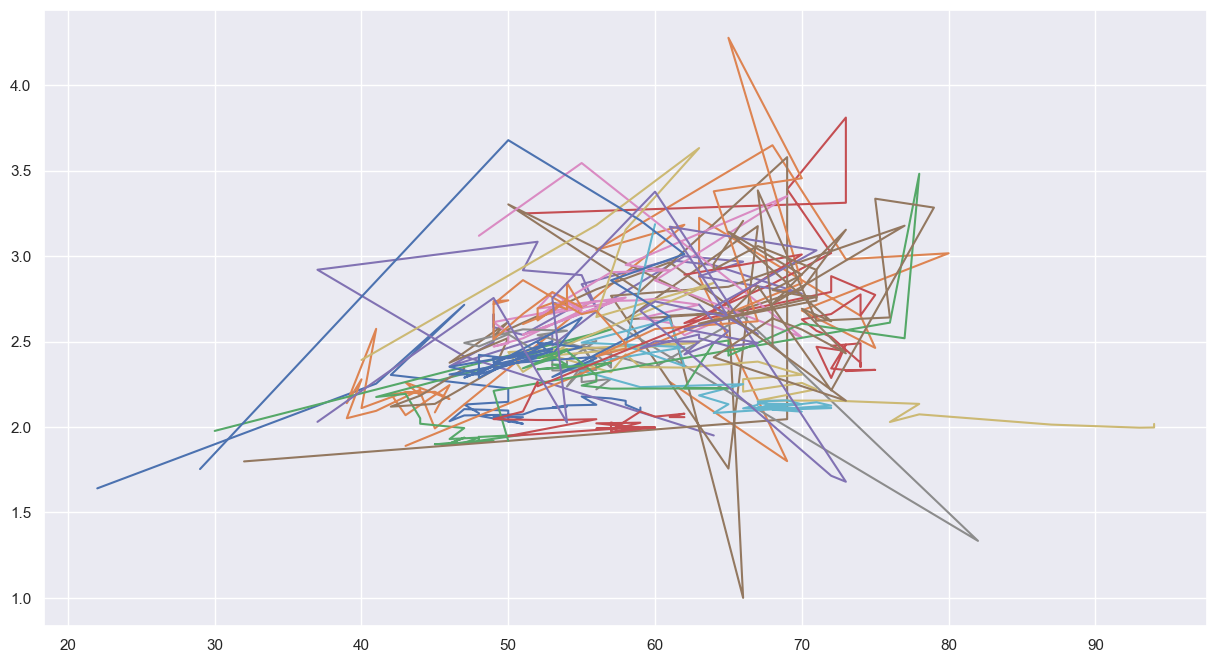

In [4]:
for field_name, df in dfs_temporal.items():
    years = []
    avg_geos = []
    ns = []

    for year, df in sorted(df.items(), key=lambda t: t[0]):
        G = nx.Graph()
        G.add_edges_from(df[['u', 'v']].rows())
        ns.append(len(G))
        
        G = G.subgraph(next(nx.connected_components(G)))
        avg_geo = nx.average_shortest_path_length(G)

        years.append(year)
        avg_geos.append(avg_geo)

    plt.plot(ns, avg_geos)

In [5]:
ns

[68,
 68,
 67,
 71,
 76,
 75,
 79,
 72,
 67,
 65,
 73,
 64,
 68,
 70,
 73,
 70,
 72,
 65,
 70,
 68,
 70,
 71,
 63,
 71,
 71,
 67,
 64,
 64,
 64,
 66]

# Clustering 

In [18]:
for field_name, G in Gs.items():
    t = nx.transitivity(G)
    print(field_name, round(t, 3))
    print()

Gender Studies 0.127

Geometry 0.273

Geophysics 0.347

Economics 0.24

Language & Linguistics 0.251

Probability & Statistics 0.278

Material Engineering 0.274

Artificial Intelligence 0.236

Sociology 0.312

International Business 0.337

Political Science 0.247

Genetics & Genomics 0.155

Immunology 0.147

Human Resources & Organizations 0.245

Ethnic & Cultural Studies 0.265

Neurology 0.345

